<a href="https://colab.research.google.com/github/tuyensp2/Nguyen-Van-Tuyen/blob/main/Gradient_Descent_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python example: Gradient descent method*
*Copy form Tran Thu Le github

Note:

To run a code cell, click on it and hit Ctrl+Enter
To open this file in Google Colab, change "github" in url to "githubtocolab" and hit Enter.

# 1. What is gradient descent method?
Here we want to solve the following optimization problem
$$\min_{x\in\mathbb{R}^n} f(x)$$
where  $f$  is a $C^1(\mathbb{R}^n)$ function.

where  f  is a "good" function, for example a convex quadratic function.

It is well-known that the gradient of  $f$, denoted by  $\nabla f$, indicates the direction in which the function increases most quickly. So, to find the minimum, we shall move toward the opposite direction, that is $-\nabla f$. This is the basic idea of gradient descent method. More precisely, assuming that we are being at a location, say  $x$ . To find minimum, in the next step, we should move with a small step-size  $\alpha$ $(\alpha\in(0,+\infty))$  in the direction of  $-\nabla f(x)$, in this way, our new position is $x\alpha\nabla f(x)$.

**Gradient Descent Method**

**INPUT**:  $f,\alpha$ 

**Step 1**. Initialize  $x$  at the origin

**Step 2**. Compute gradient  $\nabla f(x)$ 

**Step 3**. Update  $x=x−\alpha \nabla f(x)$  and return to Step 2

**OUTPUT**: $x$.

# 2. Example
**2.1. Problem**

Here, we are going to use gradient descent to find minimum value of the following (convex) quadratic function,
$$\min_{x\in\mathbb{R}^2} \ \ \frac{1}{2}x^TAx+b^Tx+c,$$
where $A$ is a $2\times2$ positive semidefinite matrix, $b$  is a column vector of size $2$, $c$ is a real number. Note that $x$ is also a column vector of size $2$.

Let $f(x)=\frac{1}{2}x^TAx+b^Tx+c$. Then it is easy to see that $\nabla f(x)=Ax+b$. Hence, the Gradient descent method is as follows.

**Gradient Descent Method for quadratic function**

**INPUT:** $A, b, c, \alpha$

**Step 1.** Initialize  $x=[0,0]^T$

**Step 2.** Compute gradient $\nabla f(x)=Ax+b$

**Step 3.** Update $x=x-\alpha\nabla f(x)$ and return to Step 2

**OUTPUT:** The value of $x$.

**2.2. Code**

We first add a popular python package called "numpy" and rename it as "np".

You may imagine that numpy is a collection of tools for matrix and vector calculations.

In [8]:
import numpy as np

We now define our gradient descent algorithm.

In [9]:
def gradient_descent(A, b, c, alpha):
    x_list = [] 
    x = np.array([[0], [0]]) # Step 1 
    for i in range(100):
        gradient = A @ x + b # Step 2
        x = x - alpha*gradient # Step 3
        x_list = x_list + [x]
    return x, x_list

Let us define the precise values for $A, b, c, \alpha$

In [10]:
A = np.array([[2, 0], [0,8]])
b = np.array([[2], [4]])
c = 2
alpha = 0.05

Here, we see that
$$f(x)=(x_1+1)^2+(2x_2+1)^2$$
It is easy to see that the minimum value of  $f$  is  $0$  when  $x=(-1,-0,5)$.

As you will see in the following, the gradient method will generate a sequence of  $x$  converging to  $(−1,−0.5)$.

We run the gradient descent method

In [11]:
x_opt, x_list = gradient_descent(A, b, c, alpha)

**2.3. Check result**

Let us see if x_opt is close to  $(−1,−0.5)$

In [ ]:
print(x_opt)

So x_opt is indeed our desired minimizer.

For  $x$  in x_list, we compute its objective value  $f(x)$  and plot it. out.

In [ ]:
import matplotlib.pyplot as plt # import plotting package
values = [float(0.5 * x.T @ (A @ x) + b.T @ x + c) for x in x_list]
plt.plot(values)
plt.xlabel("iterations")
plt.ylabel("objective values")
plt.yscale("log")
plt.show()

Now, we plot the evolution of  $x$  where  $x$  in x_list

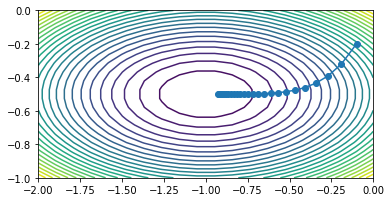

In [21]:
def plot_evolution(x_list):
    x0 = np.linspace(-2, 0, 20)
    x1 = np.linspace(-1, 0, 20)
    x0, x1 = np.meshgrid(x0, x1) 
    f = x0**2 + 4*x1**2 + 2*x0 + 4*x1 + 2 

    x_iter = np.hstack(x_list) 
    x_iter = x_iter[:, :25] # take first 25 x

    fig, ax = plt.subplots()
    ax.contour(x0, x1, f, levels=25)
    ax.plot(x_iter[0, :], x_iter[1, :], "-o")
    ax.set_aspect("equal")
    plt.show()

plot_evolution(x_list)

We see that the sequence converges to  $x=(−1,−0.5)$  which is exactly the minimizer of  $f$.